## 12 month Sales Sheet Data Analysis

The purpose of this project is to pre-process the given data using Pandas and MatPlotLib. 

The various tasks to be performed are:

We start by cleaning our data. Tasks during this section include:

* Drop NaN values from DataFrame
* Removing rows based on a condition
* Change the type of columns (to_numeric, to_datetime, astype)

Once the data is cleaned we move onto the data exploration process, basically the part where we answer some questions related to the data. For this specific dataset we answer the following questions:

* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?
* What products are most often sold together?

To answer these questions we will go through the following Pandas and MatPlotlib methods, each of which will be explained briefly in markdown.

1. Concatenating multiple csvs together to create a new DataFrame (pd.concat)
2. Adding columns
3. Parsing cells as strings to make new columns (.str)
4. Using the .apply() method
5. Using groupby to perform aggregate analysis
6. Plotting bar charts and lines graphs to visualize our results
7. Labeling our graphs


#### Step 1: Import the necessary libraires

In [27]:
import pandas as pd
import os

#### Step 2: Merge all the different data files into one file.

First, we merge the 12 months of data we have into one single file, to make it easier to analyse the data and also on the basis of what's asked of us. 

If we're asked to analyse only the data for the month of August then we use just the August data. When talking about the whole data we merge the files.

In [28]:
df_january = pd.read_csv(r"C:\Users\poonam and pratiti\OneDrive\Desktop\ML and Python\Basic Projects Practice\Sales Analysis-1\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_January_2019.csv")
# print(df_january)

df_january.head() #gives me the top 5 rows 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


now what we want to do is basically be able to read all our files together.

In [29]:
files = [file for file in os.listdir(r'C:\Users\poonam and pratiti\OneDrive\Desktop\ML and Python\Basic Projects Practice\Sales Analysis-1\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
# listed all the files in the directory
for file in files:
    print(file)

# we have got the output as the list of all the files in the directory

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


We got the names of all the files here so that we can concatenate all the files into one single csv.

Syntax: df = pd.concat(
    map(pd.read_csv *function*, ['mydata.csv', 'mydata1.csv']) *iterables*, ignore_index=True)

In [30]:
all_data = pd.DataFrame() # used to create an empty dataframe for all the months data

for file in files: # here, we use a loop to 
    # read (loading the data) each individual file into the dataframe called "df",
    # this is done by giving the file path and the concatenating the individual files name that we read earlier from the directory
    # now, every individual file is added to the empty dataframe "all_data" 
    df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"  + file)
    all_data = pd.concat([all_data, df])

all_data.head()

# we convert this file with all our data into a single csv file
all_data.to_csv('all_data_mine.csv', index = False)
# we use index= False, when we want to save the data without the automatic index,
# if index=True, it is saved with default index

We converted the merged data into a csv file that can be viewed in our systems file viewer as "all_data_mine.csv"

With this we have complete the step of merging all the data into one file, now we can actully start manipulating the data.

In [31]:
all_data = pd.read_csv("./all_data_mine.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Step 3: Analyse what is asked and create a pipeline 

1. Question 1

#### What was the best month for sales? How much was earned that month?

* Basically, we need to see which month had the highest number of sales

--> number of orders per month and then compare, which month had the highest number of orders.

* And the total amount earned in that month from the sales. 

--> Identify the month with the highest sales and add the product price of each order for each month. 

However, it is not that easy, first we need to clean the data to see if there are any NaN values, etc. 


### Augment the data with additional columns

Add a month column, 

Logic behind this is we take the first two charcters of the "Order Date" column and make a new column with these characters. 

Example, "04/19/19" the first two characters are "04", which means the month of April and then we'll make this as a whole different column.

In [35]:
all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = float(all_data['Month']) # this will give you an error
# we use astype method of pandas

all_data = all_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
# use "dropna()" method to remove the NaN values in the data

all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [36]:
# we can also use another way to locate the NaN in the dataset
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head() # returns the dataframe with all the NaN values in the data.

#nothing is displayed in the output because we got rid of the NaN above using the 'dropna' method



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


#### We now want to clean up the data to get rid of the 'Or'

In [34]:
#first we locate where the or is occuring in the Order Date column

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Add another column with the sales value for each product

Sales = total number of money made in each order 


In [37]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float32')
all_data.head()

print(list(all_data)) #gives you the list of all columns of the dataset
all_data = all_data.reindex(columns=['Order ID', 'Product', 'Month', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Purchase Address'])
all_data.head()

['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Month', 'Sales']


,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,4,1,600,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,4,1,11.99,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,4,1,11.99,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [38]:
result = all_data.groupby('Month').sum()
print(result)
result.max()


              Sales
Month              
1      1.822257e+06
2      2.202022e+06
3      2.807100e+06
4      3.390670e+06
5      3.152607e+06
6      2.577802e+06
7      2.647776e+06
8      2.244468e+06
9      2.097560e+06
10     3.736727e+06
11     3.199603e+06
12     4.613443e+06


Sales    4.613443e+06
dtype: float64

We can clearly see, that the month that gave us the maximum sales was the month of December(12) with sales of around 4.6 Million *currency*

#### Plotting the results

In [39]:
import matplotlib.pyplot as plt

#imported the MatPlotLib module

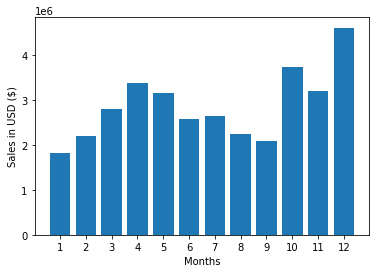

In [40]:
# make a bar chart of the results 
months = range(1,13) #it is exclusive so, 13 is not included
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 2) What City had the highest number of sales

the first thing would be to create a new column called city, which lists down all the cities in the data. We have the purchase address. 

Then later we can groupby city and figure out which city had the highest sales, since we already have a 'Sales' column 


In [41]:
all_data.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,4,1,600,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,4,1,11.99,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,4,1,11.99,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [42]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

# here we used the .apply() that basically allows us to apply any arbitrary function to the data
# be it a specific column or a set of columns
# we also used the lambda function
# and we used the split() that basically allowed us to split the string 
# we noticed that the name of the city was between the commas ',' so we split according to the commas
# we gave index number as 1, because 0 would've been the space before the name of the city began 

all_data.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,4,1,600,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,4,1,11.99,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,4,1,11.99,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


In [43]:
city_result = all_data.groupby('City').sum()['Sales']
print(city_result)

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64


In [44]:
city = [city for city, df in all_data.groupby('City')]

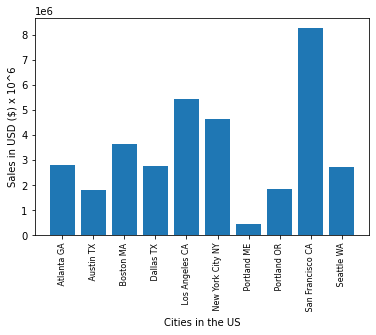

In [45]:
plt.bar(city, city_result)
plt.xlabel('Cities in the US')
plt.xticks(city, rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($) x 10^6')
plt.show()

from this it is clear that the city with the highest number of sales is 'San Francisco', with around 8 million USD in sales

#### Question 3) What time should the advertisements be displayed for maximum sales?

In [46]:
all_data.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,4,1,600,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,4,1,11.99,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,4,1,11.99,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


We have been given the order date, which also mentions the time at which the order was placed. 

Using this information we can create a distribution of the time's at which people placed the order and around what particular time they placed the order. 

According to this information, we can then decide at what particular time during the day should the ad's be shown.

In [47]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"], errors='coerce')
all_data.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,4,1,600,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,4,1,11.99,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,4,1,11.99,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


In [48]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()
all_data.dropna()
all_data['Hour'] = all_data['Hour'].dropna()

In [49]:
# removing the nan values from the dataframe, causing the errors in plotting
all_data = all_data.dropna()
all_data.reset_index(drop=True)
all_data['Hour'].isnull().sum()


0

In [50]:
all_data.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,8,46
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,22,30
3,176560,Google Phone,4,1,600,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
4,176560,Wired Headphones,4,1,11.99,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
5,176561,Wired Headphones,4,1,11.99,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,9,27


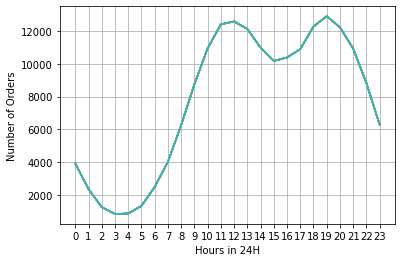

In [51]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours in 24H')
plt.ylabel('Number of Orders')
plt.show()

From the graph we can infer that, the maximum orders are placed around 12PM and 7PM. 

So, if we were to use advertisements for maximum likelihood of a purchase it should be around these times

#### Question 4) What products are sold together?

In [52]:
all_data.head()
all_data.dropna()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,4,2,11.95,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,8,46
2,176559,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,22,30
3,176560,Google Phone,4,1,600,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
4,176560,Wired Headphones,4,1,11.99,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
5,176561,Wired Headphones,4,1,11.99,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),9,3,2.99,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles CA,20,56
186846,259354,iPhone,9,1,700,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco CA,16,0
186847,259355,iPhone,9,1,700,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,9,1,379.99,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco CA,17,30


Make a dataframe for only the order id's that are duplicated or repeated, is that they are the only thinsg we should be concerned with if we want to know which items were ordered together

In [53]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df = df.dropna()
df.head(25)


,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hour,Minute
3,176560,Google Phone,4,1,600,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
4,176560,Wired Headphones,4,1,11.99,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
18,176574,Google Phone,4,1,600,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42
19,176574,USB-C Charging Cable,4,1,11.95,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42
30,176585,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA,11,31
31,176585,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA,11,31
32,176586,AAA Batteries (4-pack),4,2,2.99,5.980000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco CA,17,0
33,176586,Google Phone,4,1,600,600.000000,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",San Francisco CA,17,0
119,176672,Lightning Charging Cable,4,1,14.95,14.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City NY,11,7
120,176672,USB-C Charging Cable,4,1,11.95,11.950000,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",New York City NY,11,7


In [54]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

,Order ID,Product,Month,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,City,Hour,Minute,Grouped
3,176560,Google Phone,4,1,600,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,4,1,11.99,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,4,1,600,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,4,1,11.95,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,4,1,99.99,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [55]:
df = df[['Order ID' , 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [56]:
from itertools import combinations
from collections import Counter

In [60]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From this it is quite evident that items bought most commonly together are an IPhone with the lightning charging cable.